# Ex. 07
## Edge Linking Using Hough Transform 

**Name  :** KISHORE S
**Reg No:** 212224230130
**Slot  :** 4E6-1

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread('lan_img1.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

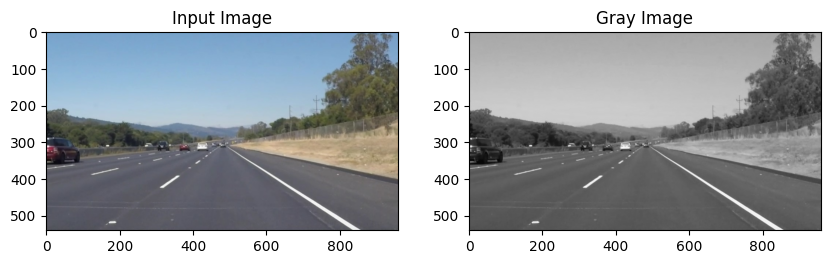

In [7]:
plt.figure(figsize=(10,20))
plt.subplot(121);plt.imshow(image);plt.title("Input Image")
plt.subplot(122);plt.imshow(gray_image,cmap='gray');plt.title("Gray Image")
plt.show()

In [9]:
threshold = cv2.inRange(gray_image, 150, 255)

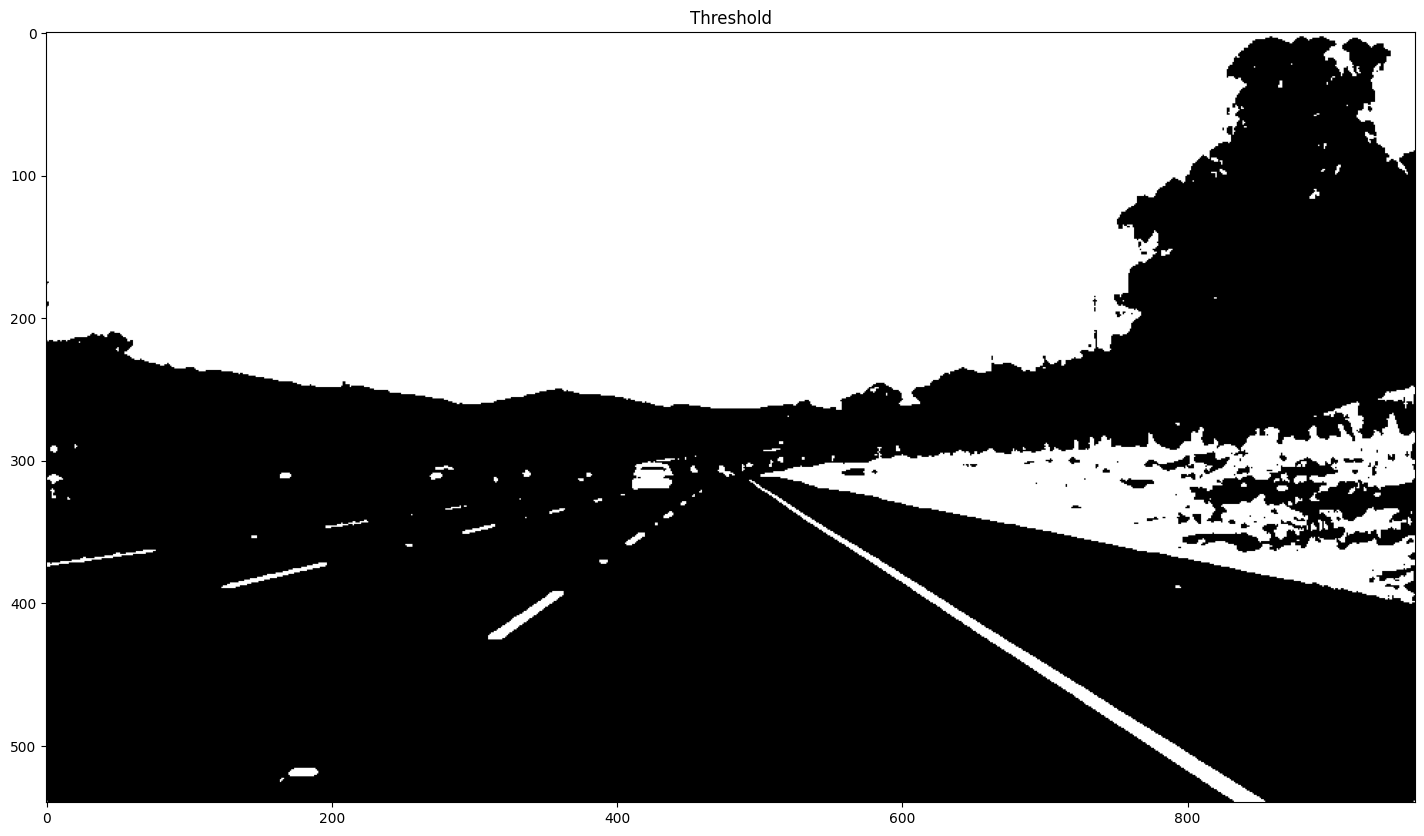

In [11]:
plt.figure(figsize = (20, 10))
plt.subplot(1,1,1);plt.imshow(threshold,cmap = 'gray'); plt.title('Threshold');plt.show()

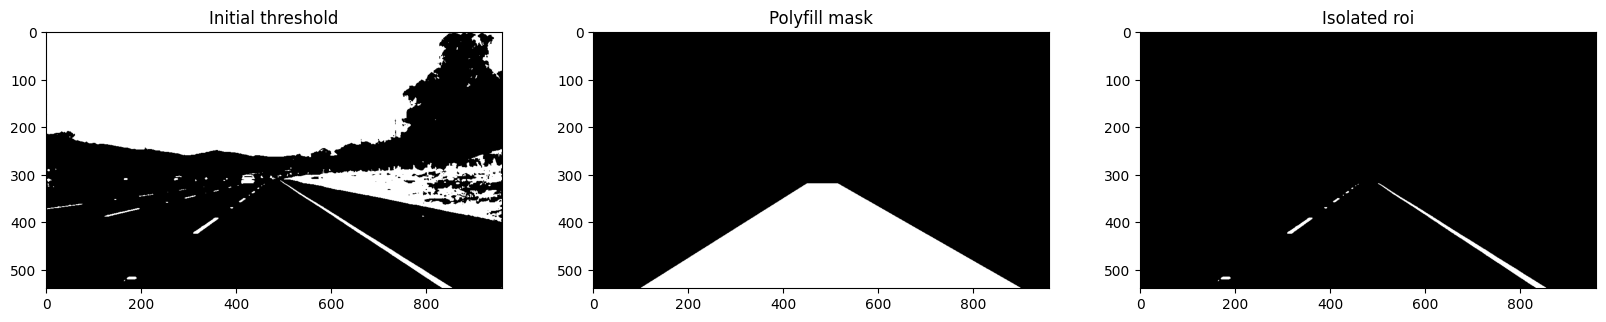

In [13]:
roi_vertices = np.array([[[100, 540],
                          [900, 540],
                          [515, 320],
                          [450, 320]]])
mask = np.zeros_like(threshold)   

if len(threshold.shape) > 2:
    channel_count = threshold.shape[2] 
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

cv2.fillPoly(mask, roi_vertices, ignore_mask_color)
roi = cv2.bitwise_and(threshold, mask)

plt.figure(figsize = (20, 10))
plt.subplot(1,3,1); plt.imshow(threshold, cmap = 'gray'); plt.title('Initial threshold')
plt.subplot(1,3,2); plt.imshow(mask, cmap = 'gray');      plt.title('Polyfill mask')
plt.subplot(1,3,3); plt.imshow(roi, cmap = 'gray');       plt.title('Isolated roi');

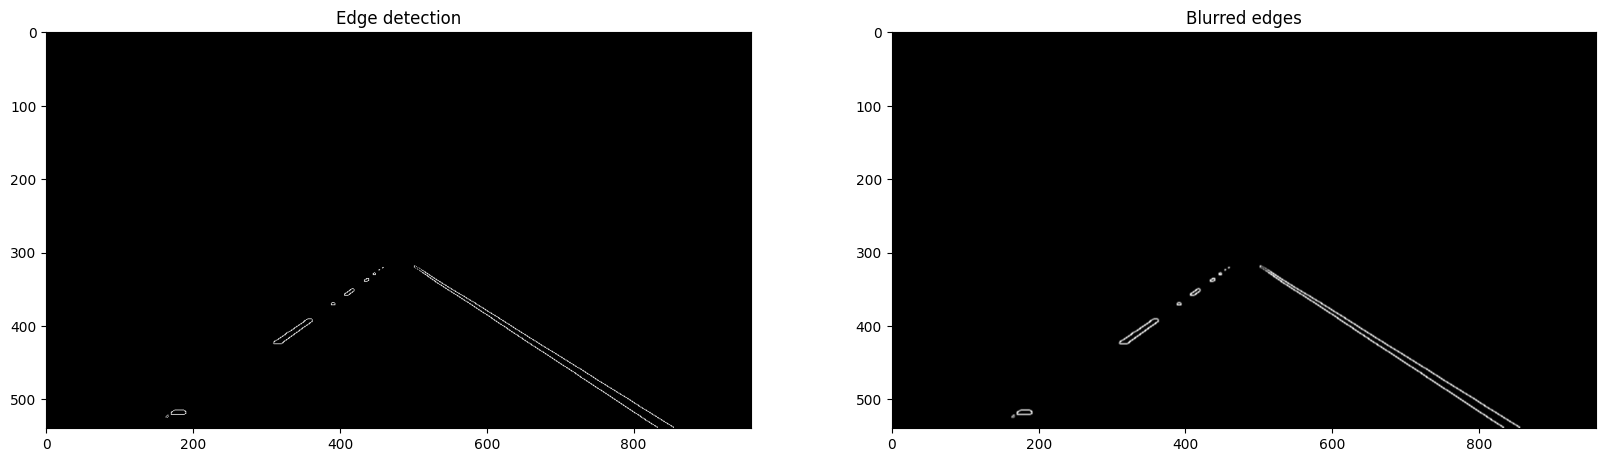

In [15]:
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(roi, low_threshold, high_threshold)

kernel_size = 3
canny_blur = cv2.GaussianBlur(edges, (kernel_size, kernel_size), 0)

plt.figure(figsize = (20, 10))
plt.subplot(1,2,1); plt.imshow(edges, cmap = 'gray'); plt.title('Edge detection')
plt.subplot(1,2,2); plt.imshow(canny_blur, cmap = 'gray'); plt.title('Blurred edges');

In [17]:
def draw_lines(img, lines, color = [255, 0, 0], thickness = 2):
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

Found 24 lines, including: [[505 319 855 537]]


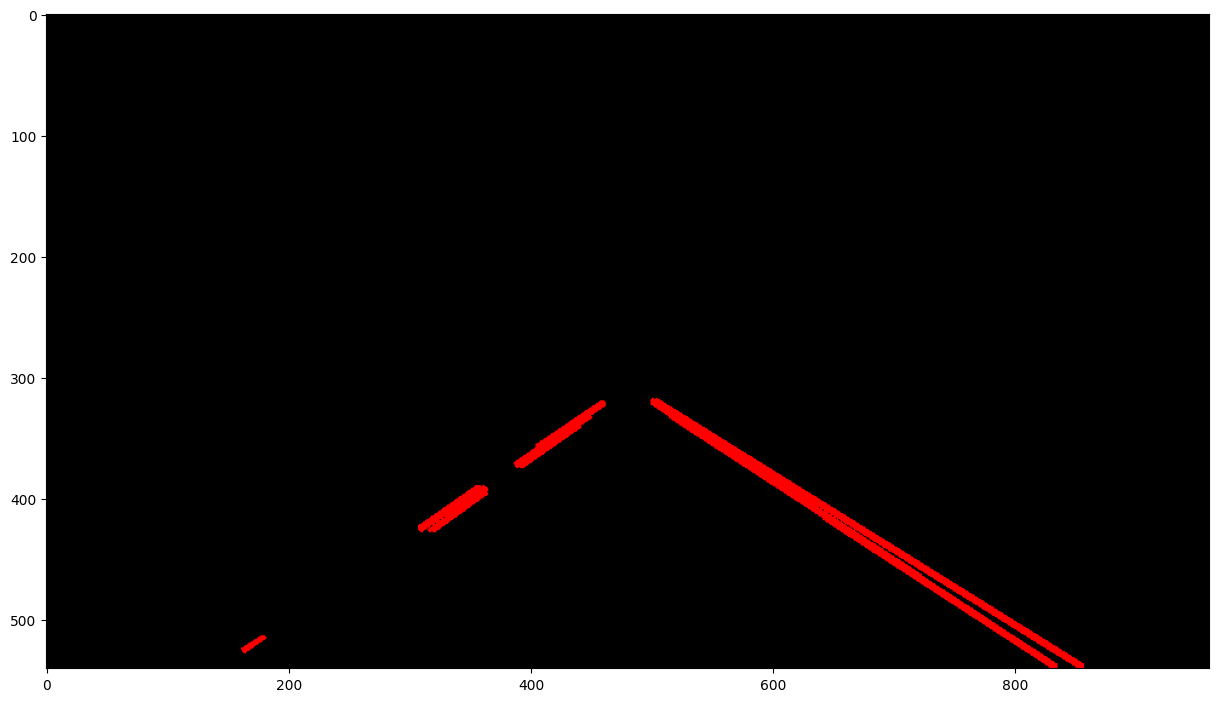

In [19]:
rho = 1
theta = np.pi / 180
threshold = 50
min_line_len = 10
max_line_gap = 20

lines = cv2.HoughLinesP(
    canny_blur, rho, theta, threshold, minLineLength = min_line_len, maxLineGap = max_line_gap)

hough = np.zeros((image.shape[0], image.shape[1], 3), dtype = np.uint8)
draw_lines(hough, lines)

print("Found {} lines, including: {}".format(len(lines), lines[0]))
plt.figure(figsize = (15, 10)); plt.imshow(hough);